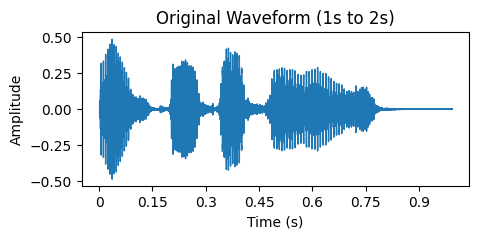

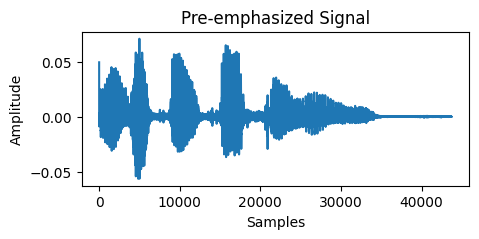

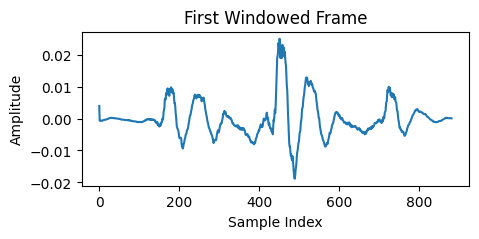

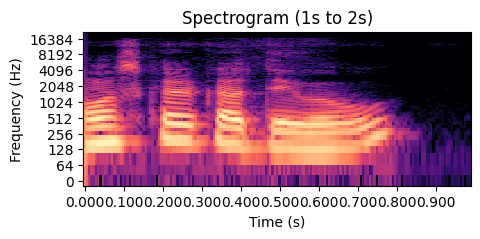

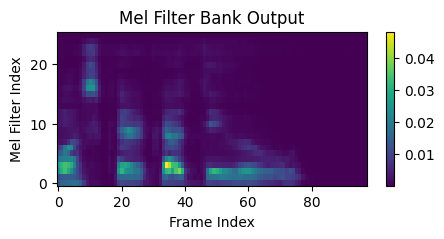

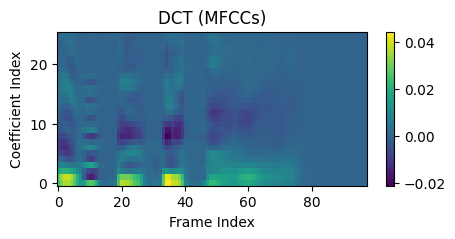

In [62]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal
import soundfile as sf

# Load the audio file
file_path = r"C:\Users\Ronu\Desktop\AML\datatest\cut\BS2T_Ayodhya_Purulia_Rice_SumabManna_first_2_minutes.wav"
y, sr = librosa.load(file_path, sr=None)

# Extract the segment from 1s to 2s
start_sample = int(sr * 1.009)
end_sample = int(sr * 2)
segment = y[start_sample:end_sample]

# Plot original waveform
plt.figure(figsize=(5, 2))
librosa.display.waveshow(segment, sr=sr)
plt.title("Original Waveform (1s to 2s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.savefig(r"C:\Users\Ronu\Desktop\AML\datatest\cut\wave.png")
plt.show()

# Step 1: Pre-emphasis (to boost high frequencies)
pre_emphasis = 0.97
emphasized_signal = np.append(segment[0], segment[1:] - pre_emphasis * segment[:-1])

plt.figure(figsize=(5, 2))
plt.plot(emphasized_signal)
plt.title("Pre-emphasized Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.savefig(r"C:\Users\Ronu\Desktop\AML\datatest\cut\preemphasis.png")

plt.show()

# Step 2: Framing
frame_size = 0.020  # 25ms
frame_stride = 0.01  # 10ms
frame_length, frame_step = int(frame_size * sr), int(frame_stride * sr)

num_frames = int(np.ceil(float(np.abs(len(emphasized_signal) - frame_length)) / frame_step)) + 1
pad_signal_length = num_frames * frame_step + frame_length
pad_signal = np.append(emphasized_signal, np.zeros((pad_signal_length - len(emphasized_signal))))

frames = np.lib.stride_tricks.as_strided(
    pad_signal,
    shape=(num_frames, frame_length),
    strides=(pad_signal.strides[0] * frame_step, pad_signal.strides[0])
)

"""plt.figure(figsize=(10, 4))
plt.imshow(frames.T, aspect='auto', origin='lower')
plt.title("Framed Signal")
plt.xlabel("Frame Index")
plt.ylabel("Sample Index")
plt.show()"""

# Step 3: Windowing (Hamming window)
hamming_window = np.hamming(frame_length)
windowed_frames = frames * hamming_window

plt.figure(figsize=(5, 2))
plt.plot(windowed_frames[0])
plt.title("First Windowed Frame")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.savefig(r"C:\Users\Ronu\Desktop\AML\datatest\cut\window.png")

plt.show()

# Step 4: FFT (Fast Fourier Transform)
n_fft = 1024
hop_length = n_fft // 4

# Compute STFT only for the 1s to 2s segment
D = np.abs(librosa.stft(segment, n_fft=n_fft, hop_length=hop_length))

# Convert to decibel scale
D_dB = librosa.amplitude_to_db(D, ref=np.max)

# Plot spectrogram for 1s to 2s segment
plt.figure(figsize=(5, 2))
librosa.display.specshow(D_dB, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
plt.title("Spectrogram (1s to 2s)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.savefig(r"C:\Users\Ronu\Desktop\AML\datatest\cut\spectrogram.png")  # Save spectrogram
plt.show()

# Step 5: Mel Filter Bank
n_mels = 26
mel_filters = librosa.filters.mel(sr=sr, n_fft=NFFT, n_mels=n_mels)
mel_spectrogram = np.dot(mel_filters, fft_magnitude.T)

plt.figure(figsize=(5, 2))
plt.imshow(mel_spectrogram, aspect='auto', origin='lower')
plt.title("Mel Filter Bank Output")
plt.xlabel("Frame Index")
plt.ylabel("Mel Filter Index")
plt.colorbar()
plt.savefig(r"C:\Users\Ronu\Desktop\AML\datatest\cut\mel.png")

plt.show()

# Step 6: DCT (MFCC Extraction)
mfccs = scipy.fftpack.dct(mel_spectrogram, axis=0, norm='ortho')

plt.figure(figsize=(5, 2))
plt.imshow(mfccs, aspect='auto', origin='lower')
plt.title("DCT (MFCCs)")
plt.xlabel("Frame Index")
plt.ylabel("Coefficient Index")
plt.colorbar()
plt.savefig(r"C:\Users\Ronu\Desktop\AML\datatest\cut\mfcc.png")

plt.show()


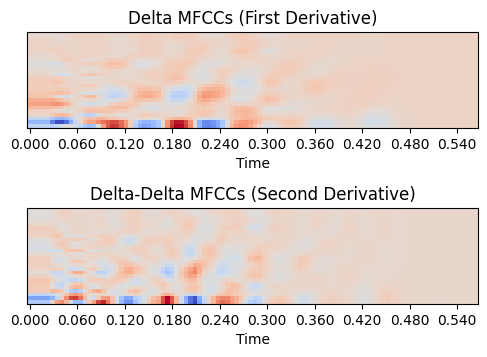

In [60]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

# Plot MFCC, Delta, and Delta-Delta
plt.figure(figsize=(5, 5))

# Plot Delta
plt.subplot(3, 1, 1)
librosa.display.specshow(delta_mfccs, sr=sr, hop_length=hop_length, x_axis="time")
plt.title("Delta MFCCs (First Derivative)")

# Plot Delta-Delta
plt.subplot(3, 1, 2)
librosa.display.specshow(delta2_mfccs, sr=sr, hop_length=hop_length, x_axis="time")
plt.title("Delta-Delta MFCCs (Second Derivative)")

plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\Desktop\AML\datatest\cut\mfcc_delta.png")  # Save plot
plt.show()

In [64]:
windowed_frames

array([[ 3.94287109e-03, -6.80153276e-04, -6.87315818e-04, ...,
         1.01744108e-04,  6.84182543e-05,  5.10498881e-05],
       [ 2.74755955e-04,  5.91492709e-04,  8.22404673e-04, ...,
         2.36320361e-04,  2.80802775e-04,  4.09156084e-04],
       [ 1.29401684e-06, -2.56628067e-05, -2.90940907e-05, ...,
        -4.27934946e-04, -4.39615153e-04, -4.34764624e-04],
       ...,
       [ 1.26464840e-05, -3.09371407e-05, -1.46569917e-07, ...,
        -1.50234299e-05,  1.62865612e-05,  4.58984403e-06],
       [-3.71093862e-06,  3.46730402e-06, -6.22922789e-06, ...,
         9.84462151e-06, -1.67260793e-05, -7.47070299e-06],
       [-9.91210924e-06,  1.42110626e-05,  2.44283428e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])